# Project Outline

In [ ]:
# 1. 회귀분석 프로젝트
 - 기간 : 5월 27일 ~ 7월 8일 / 6주 
 - 일정 : 매주 수요일 18:00 ~ 21:00 / 주 1회 / 1회당 3시간 / 총 6회(총 18시간)
 - 담당 : 부석준 강사님


1. y값 예측을 위한 x 데이터를 충분히 모으고 각 데이터종류와 y값과의 상관관계를 파악한다
2. EDA : 선형회귀에 대한 내용과 무관하게 데이터별로 
    - 연속형은 scatter plot 을 그려보고 rho 값과 p-value 를 체크하고 
    - 카테고리 데이터는 ANOVA 분석결과와 box plot등을 그려보고 카테고리간의 차이를 체크한다.
3. Base-line modeling: EDA 결과에 따른 데이터의 그래프 유형을 파악하여 느낌대로 x데이터에 제곱, 로그등을 취해보는 기본모델을 만든다.
4. 테스트 퍼포먼스(R-Square)를 측정한다. (트레이닝데이터 퍼포먼스가 아닌점에 주의!)

- 여기까지가 과정의 10%
- 여기서부터 노가다의 시작! come up with idea!!

5. 퍼포먼스 향상을 위한 idea를 내고 trial error 해가며 노력한다!
6. 노력과 퀄리티는 비례하며 
7. 중간중간 강사님들께 여쭤봐가며 하면 된다.



| Schedule| content  | note|
| --- | --- | --- |
| May 27 | set a subject |  |
| July 8 | Presentation|  |

#  <font color="red"> overfitting 
### <font color="pink"> SOLUTION 
#### in sample data testing and out of sample data testing = cross validation

# train-test split
## 1. training data set
## 2. test data set

# 테스트에 OLS 다시 써서 구하면 안되~ 다시 트레이닝 되니까

# K-fold 

#  <font color="red">  multicollinearity

### <font color="pink"> SOLUTION 
##### 1. VIF 의존적 변수 삭제 
##### 2. PCA 를 통한 의존적 성분삭제
##### 3. 정규화 : w 를 너무 크지 않토록 : 안정적 결과가 나온다
    - Ridge 제곱이용
    - Lasso 절대값이용  : 패널티(제한조건/정규화가중치)를 크게 주면 w가 작아져서 0이 될수가 있음
                        특성을 이용해서 의존적 변수(중요하지 않은)를 제거할 수 있다! lasso path
                       그럼 람다(패널티(제한조건/정규화가중치)를 얼마나 줘야하나
                        검증성능을 좋아지게 하는 방향으로 
<font color="red"> Validation curve 
                        를 보면서 Trial error 를 하며 맞춰가야함.
    - Elastic Net 위의 둘을 섞어이용


### ststsmodels : fit_regularized

### scikit-learn : class + regularized

In [6]:
# Validation Curve Code 

from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

boston = load_boston()
X = boston.data
y = boston.target

alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

In [9]:
# sklearn Validation Curve Code 
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    Lasso(), X, y, "alpha", alphas, cv=5, # alpas 값을 리스트 또는 array 로 넣을수 있고 cv = 5 포인트당 검증횟수 5회(== k-fold 5회)
    scoring="neg_mean_squared_error") # 5회검증 평균

plt.plot(alphas, test_scores.mean(axis=1), "-", label="검증성능 평균")
plt.plot(alphas, train_scores.mean(axis=1), "--", label="학습성능 평균")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.title("최적 정규화")
plt.show()

# 다항식의 차수를 결정하는 검정도 필요

# 포트폴리오 최적화

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_datareader import data, wb

## 주가 데이터 수집

In [8]:
import pandas_datareader.data as wb

symbols = ['AAPL', 'MSFT', 'YHOO', 'DB', 'GLD']
noa = len(symbols)
data = pd.DataFrame()
for sym in symbols:
    data[sym] = wb.DataReader(sym, data_source='google',
                              end='2014-09-12')['Close']
data.columns = symbols
data.tail()

NotImplementedError: data_source='google' is not implemented

In [9]:
(data / data.iloc[0] * 100).plot(figsize=(8, 5), grid=True)
plt.show()

IndexError: single positional indexer is out-of-bounds

## 수익률 계산

In [4]:
rets = np.log(data / data.shift(1))
rets.mean() * 252

AAPL    0.256616
MSFT    0.087852
YHOO    0.196331
DB     -0.157479
GLD     0.016068
dtype: float64

In [5]:
rets.cov() * 252

,AAPL,MSFT,YHOO,DB,GLD
AAPL,0.072982,0.020341,0.023218,0.041231,0.005259
MSFT,0.020341,0.049669,0.024301,0.046324,0.002122
YHOO,0.023218,0.024301,0.093255,0.051310,-0.000810
DB,0.041231,0.046324,0.051310,0.178445,0.008726
GLD,0.005259,0.002122,-0.000810,0.008726,0.032505


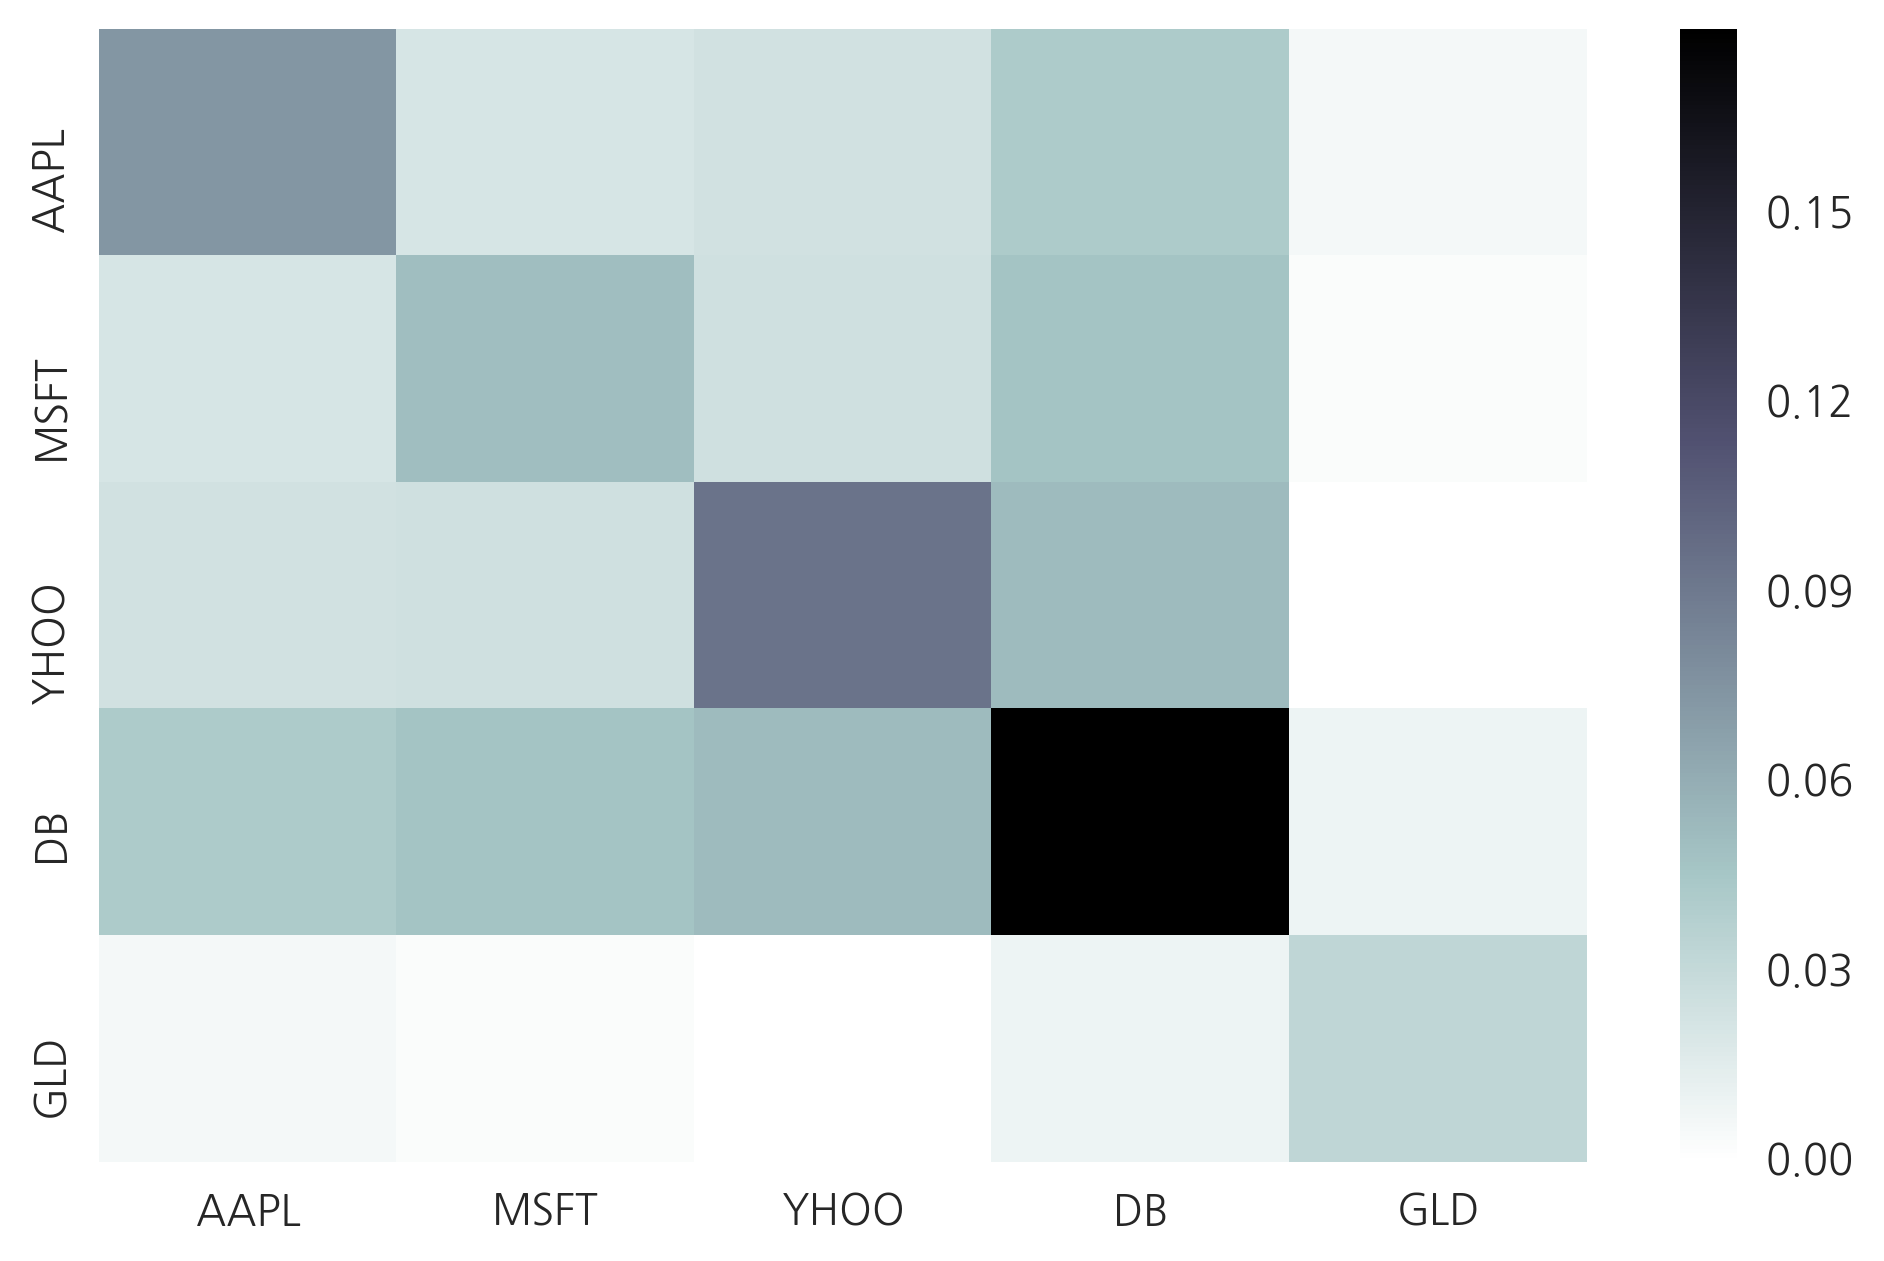

In [6]:
sns.heatmap(rets.cov() * 252, cmap=mpl.cm.bone_r)
plt.show()

## 포트폴리오 이론

* 각 자산의 수익률이 $r_i$이고 자산 비중이 $w_i$이면


* 포트폴리오 수익률은 
$$ 
\begin{eqnarray}
\mu_p 
&=& \text{E} [r_p] \\
&=& \text{E} \left[ \sum_i w_i r_i \right] \\
&=& \sum_i w_i \text{E} [r_i] \\
&=& \sum_i w_i \mu_i \\
&=& w^T \mu
\end{eqnarray}
$$
이 식에서 $\mu$ 는 자산의 기대 수익률 벡터


* 포트폴리오 분산은 
$$ 
\begin{eqnarray}
\sigma_p^2 
&=& \text{E} \left[ (r_p - \mu_p)^2 \right] \\
&=& \text{E} \left[ (w^T r - w^T \mu)^2 \right] \\
&=& \text{E} \left[ w^T(r-\mu)(r-\mu)^Tw \right] \\
&=& w^T \text{E} \left[ (r-\mu)(r-\mu)^T \right] w \\
&=& w^T \Sigma w  
\end{eqnarray}
$$
이 식에서 $\Sigma$ 는 자산 수익률의 공분산 행렬

In [7]:
np.random.seed(2)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.23349275,  0.01388454,  0.2943663 ,  0.2331326 ,  0.22512381])

In [8]:
np.sum(rets.mean() * weights) * 252

0.08583483808126474

In [9]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.040143219666608443

In [10]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.20035772924099646

## 포트폴리오 수익률 시뮬레이션

In [11]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

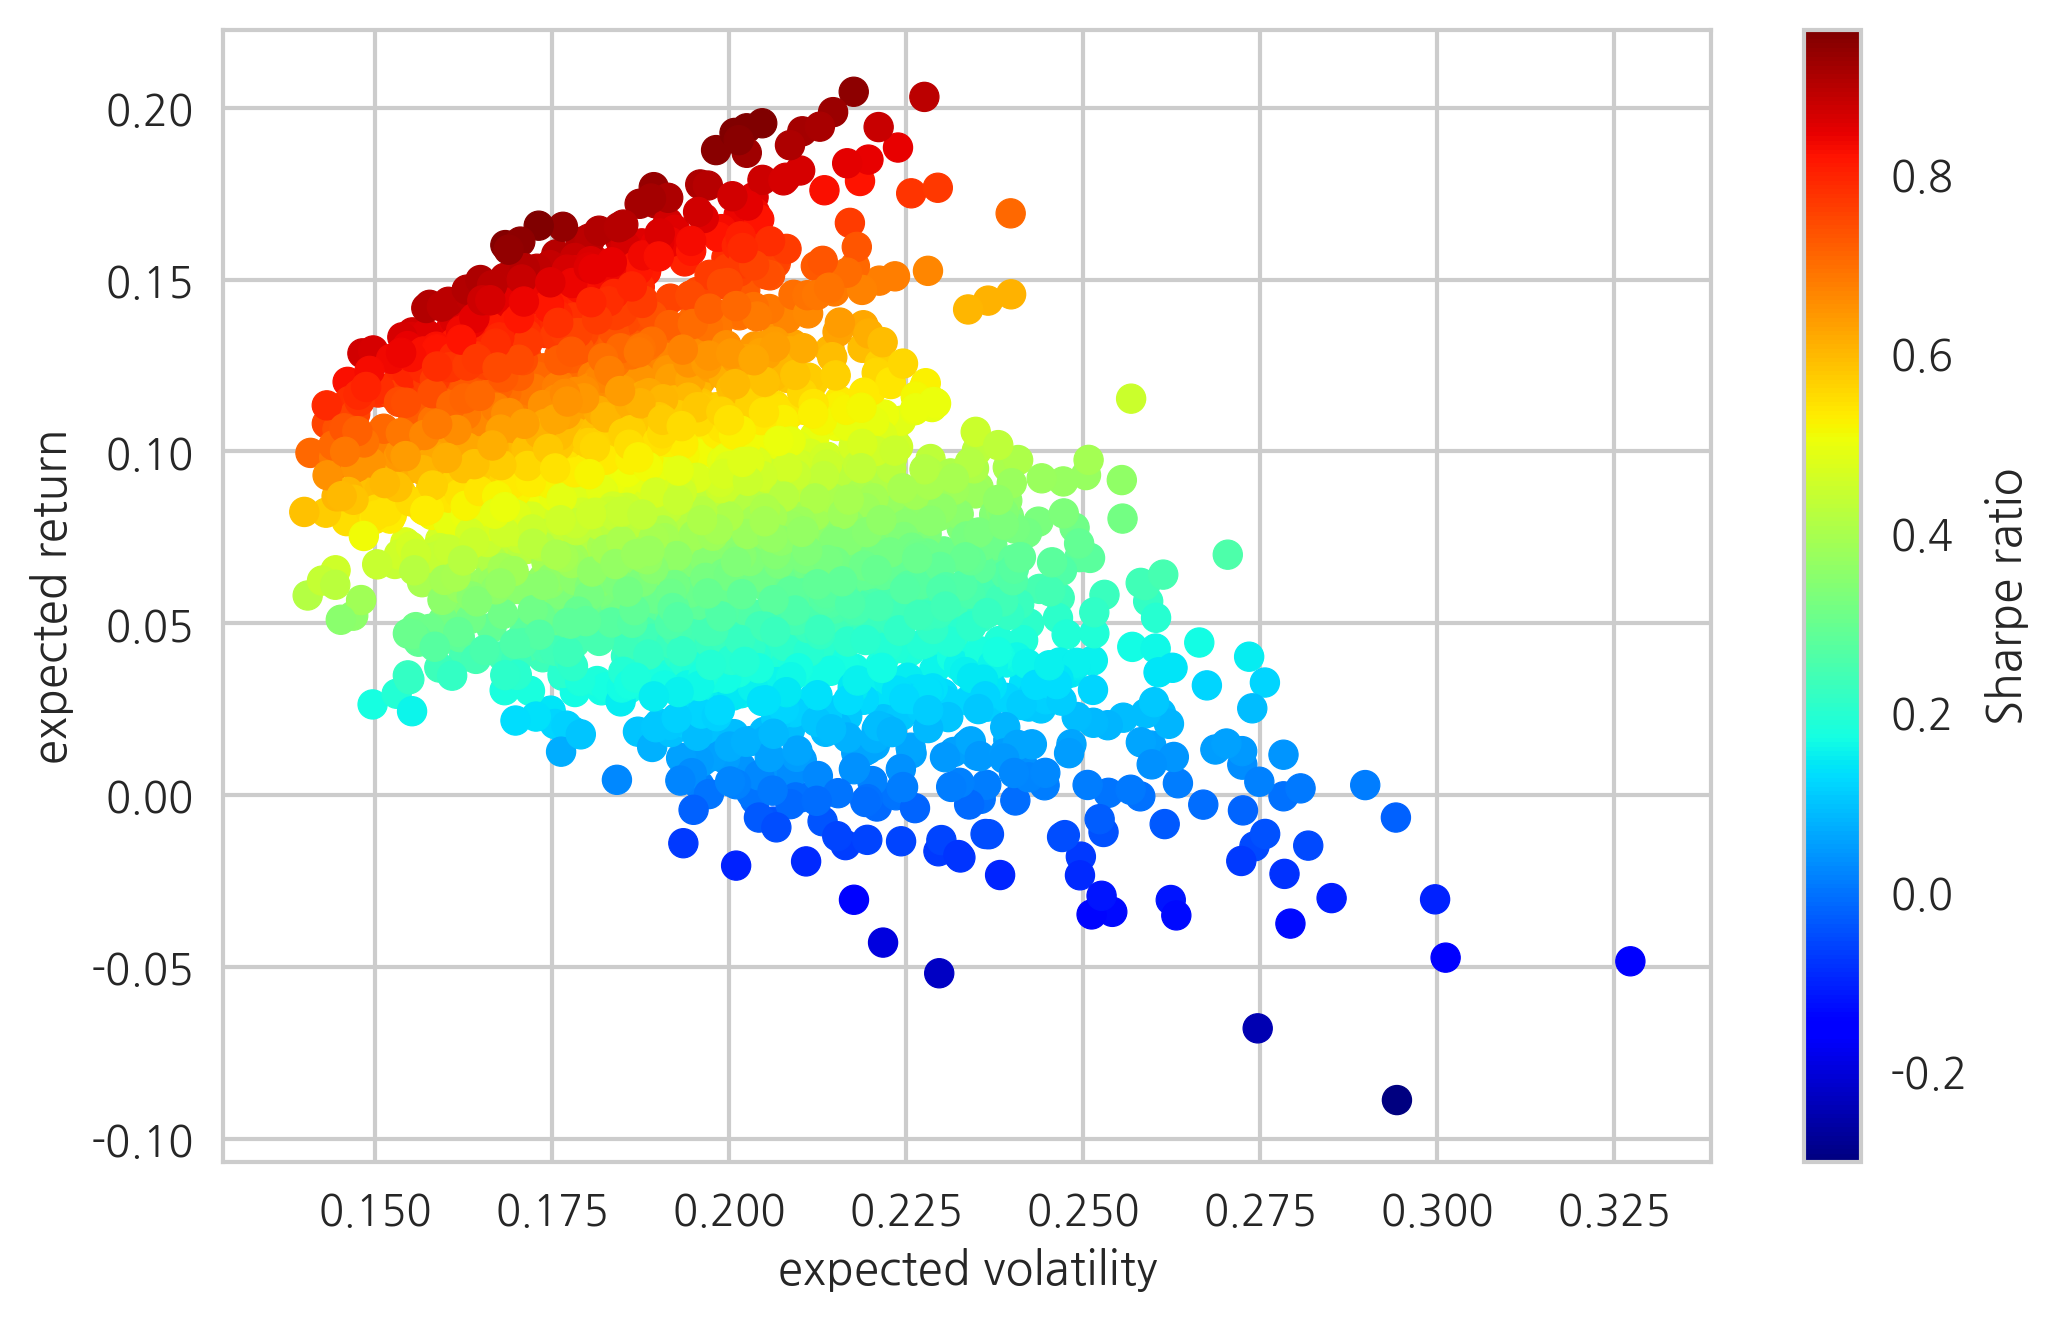

In [12]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

## 포트폴리오 통계

* 수익률, 변동성, 샤프 지수 계산

In [13]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        포트폴리오 내의 증권 비중
    
    Returns
    =======
    pret : float
        포트폴리오 수익률의 기댓값
    pvol : float
        포트폴리오 변동성의 기댓값
    pret / pvol : float
        무위험 이자율이 0일 때의 포트폴리오 샤프 지수
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

## 샤프 지수 최대화

In [14]:
import scipy.optimize as sco

In [15]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [16]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [17]:
bnds = tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [18]:
noa * [1. / noa,]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [19]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 147 ms


In [20]:
opts

     fun: -1.0273846089134062
     jac: array([ -1.75386667e-05,   3.25929075e-02,   4.06056643e-05,
         1.53298907e+00,  -2.69711018e-06])
 message: 'Optimization terminated successfully.'
    nfev: 35
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  6.93610646e-01,   2.00143721e-16,   3.00136168e-01,
         0.00000000e+00,   6.25318628e-03])

In [21]:
opts['x'].round(3)

array([ 0.694,  0.   ,  0.3  ,  0.   ,  0.006])

In [22]:
statistics(opts['x']).round(3)

array([ 0.237,  0.231,  1.027])

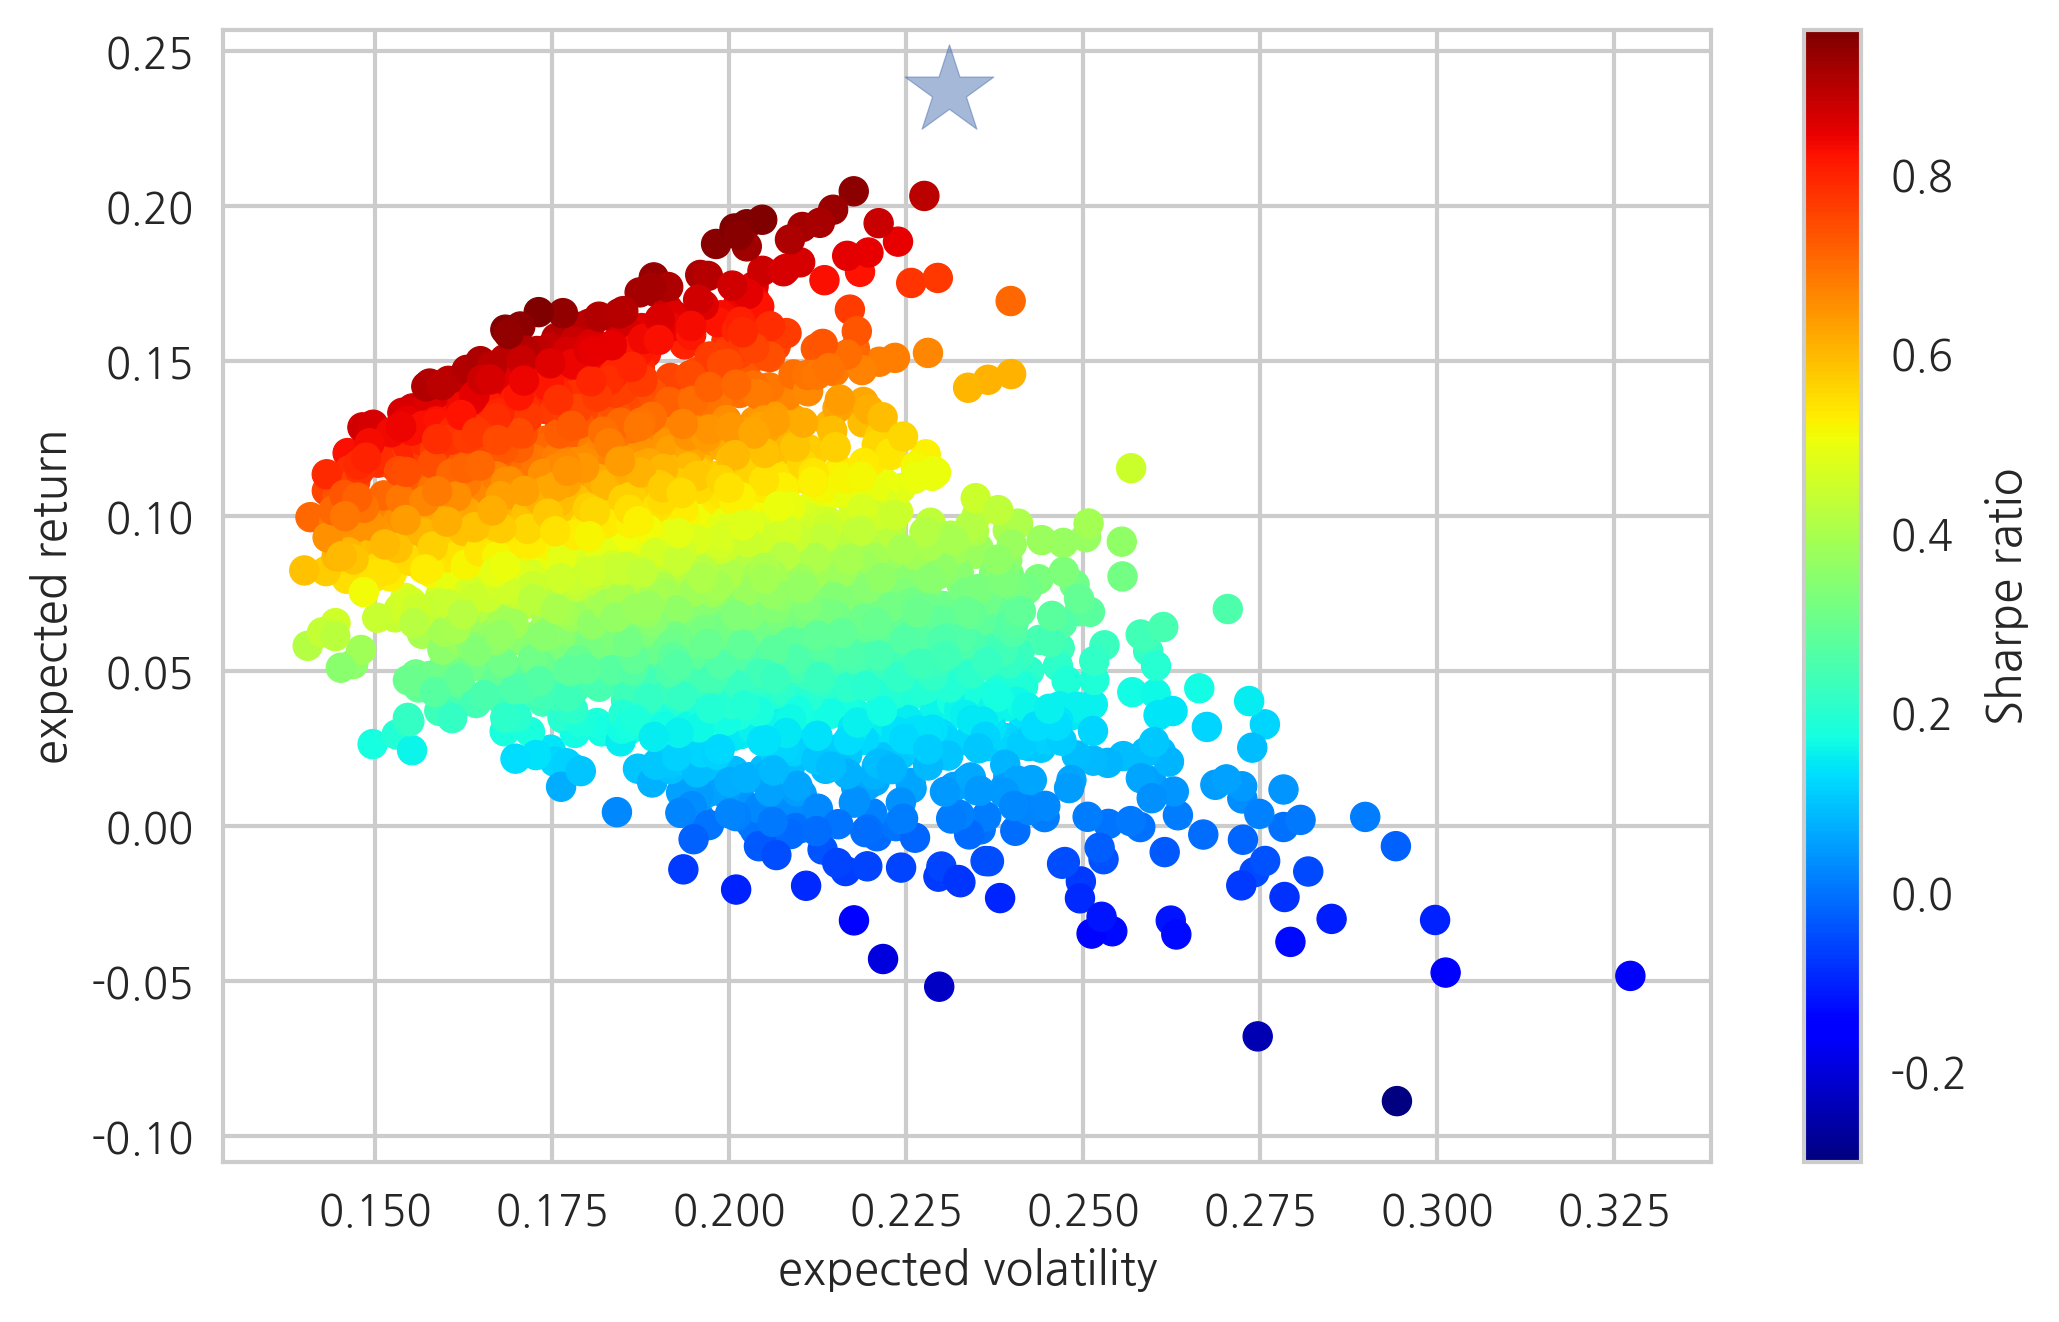

In [23]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

pt_opts = statistics(opts['x']).round(3)
plt.scatter(pt_opts[1], pt_opts[0], marker="*", s=500, alpha=0.5)
plt.show()

## 포트폴리오 분산 최소화

In [24]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [25]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [26]:
optv

     fun: 0.01834390909420736
     jac: array([ 0.03648783,  0.03656513,  0.03626689,  0.05230169,  0.03687217])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([  1.08451218e-01,   2.48333488e-01,   1.09522787e-01,
         3.52365706e-18,   5.33692506e-01])

In [27]:
optv['x'].round(3)

array([ 0.108,  0.248,  0.11 ,  0.   ,  0.534])

In [28]:
statistics(optv['x']).round(3)

array([ 0.08 ,  0.135,  0.589])

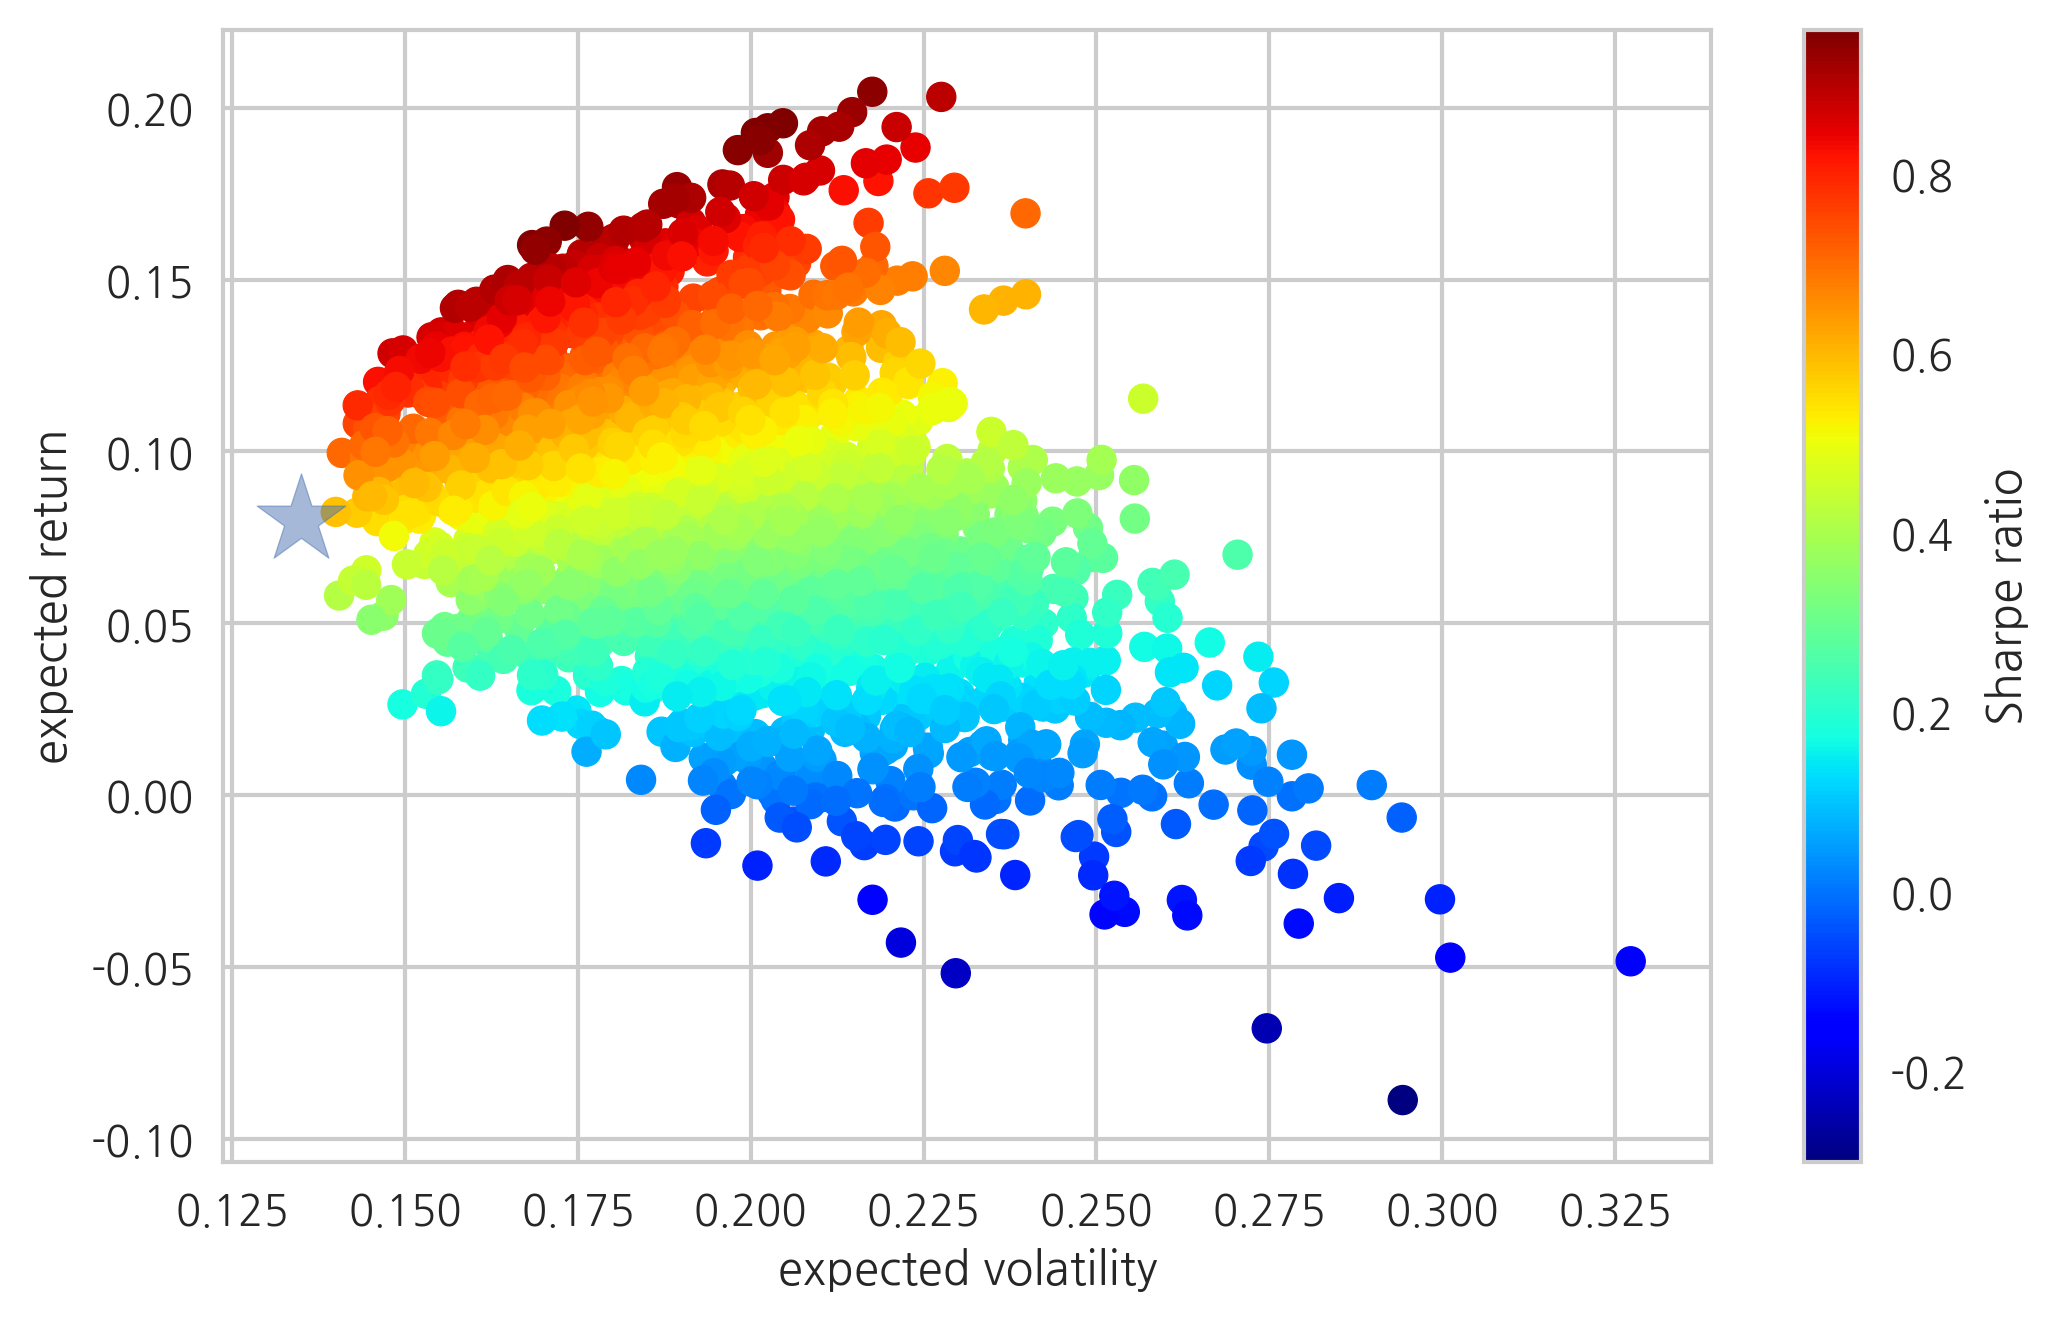

In [29]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

pt_optv = statistics(optv['x']).round(3)
plt.scatter(pt_optv[1], pt_optv[0], marker="*", s=500, alpha=0.5)
plt.show()

## 효율적 투자선

* 목표 위험 수준에 대해 최대 수익률을 가지는 모든 포트폴리오의 집합

In [30]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [31]:
def min_func_port(weights):
    return statistics(weights)[1]

In [32]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 8.97 s, sys: 20 ms, total: 8.99 s
Wall time: 9 s


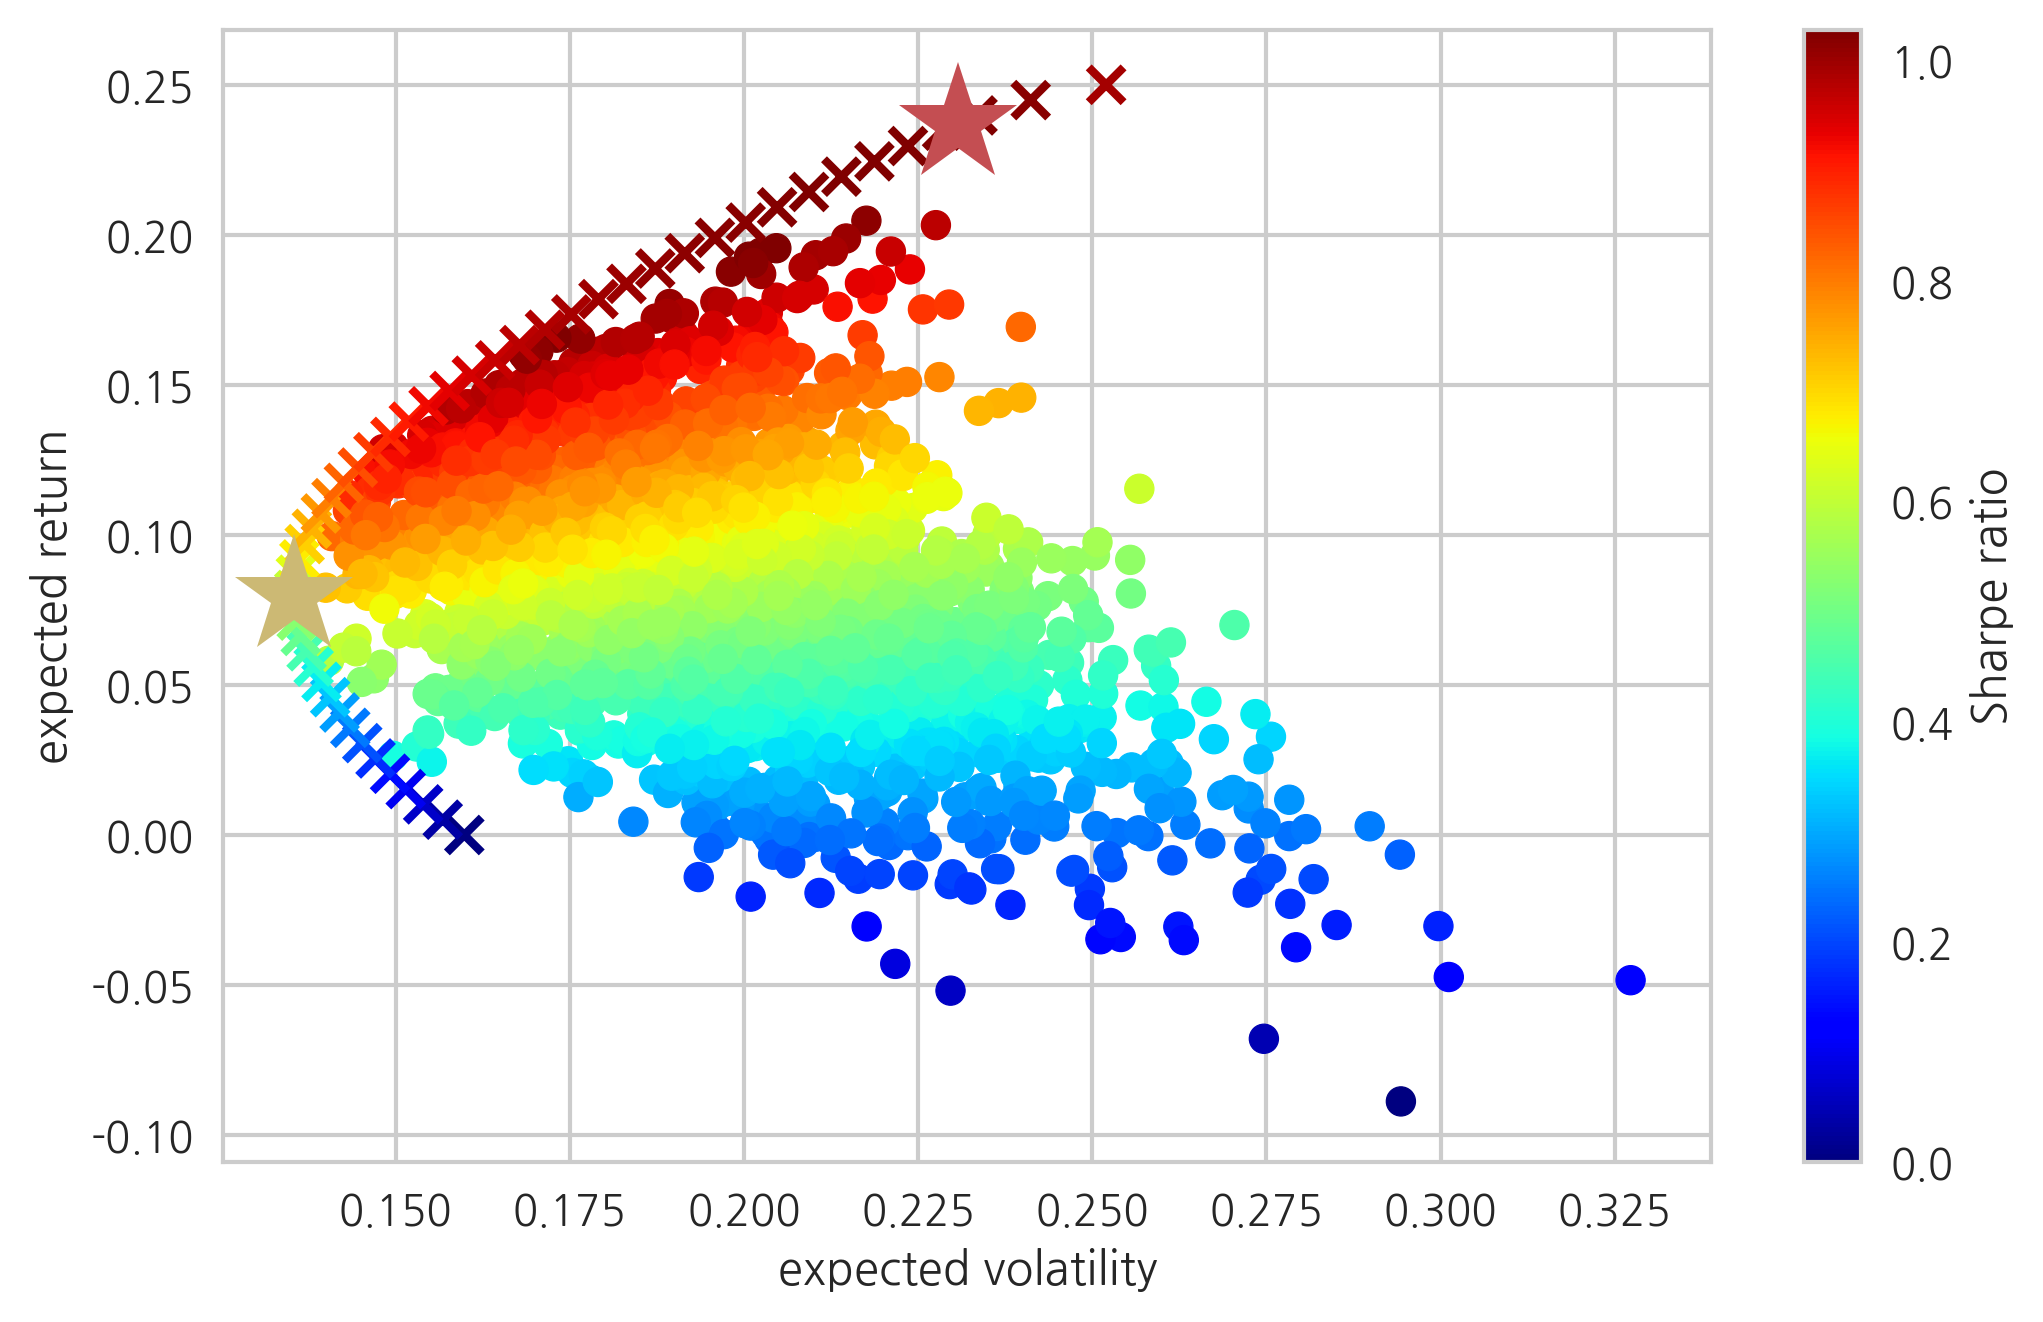

In [33]:
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o', cmap=mpl.cm.jet)
            # 무작위 포트폴리오
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x', s=70, linewidth=2, cmap=mpl.cm.jet)
            # 효율적 투자선
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=30)
            # 최대 샤프 지수를 가진 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=30)
            # 최소 분산 포트폴리오
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

## 스플라인 함수화

In [34]:
import scipy.interpolate as sci

In [35]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [36]:
tck = sci.splrep(evols, erets)

In [37]:
def f(x):
    ''' 효율적 투자선 함수 (스플라인 근사) '''
    return sci.splev(x, tck, der=0)

def df(x):
    ''' 효율적 투자선 함수의 1차 도함수 '''
    return sci.splev(x, tck, der=1)

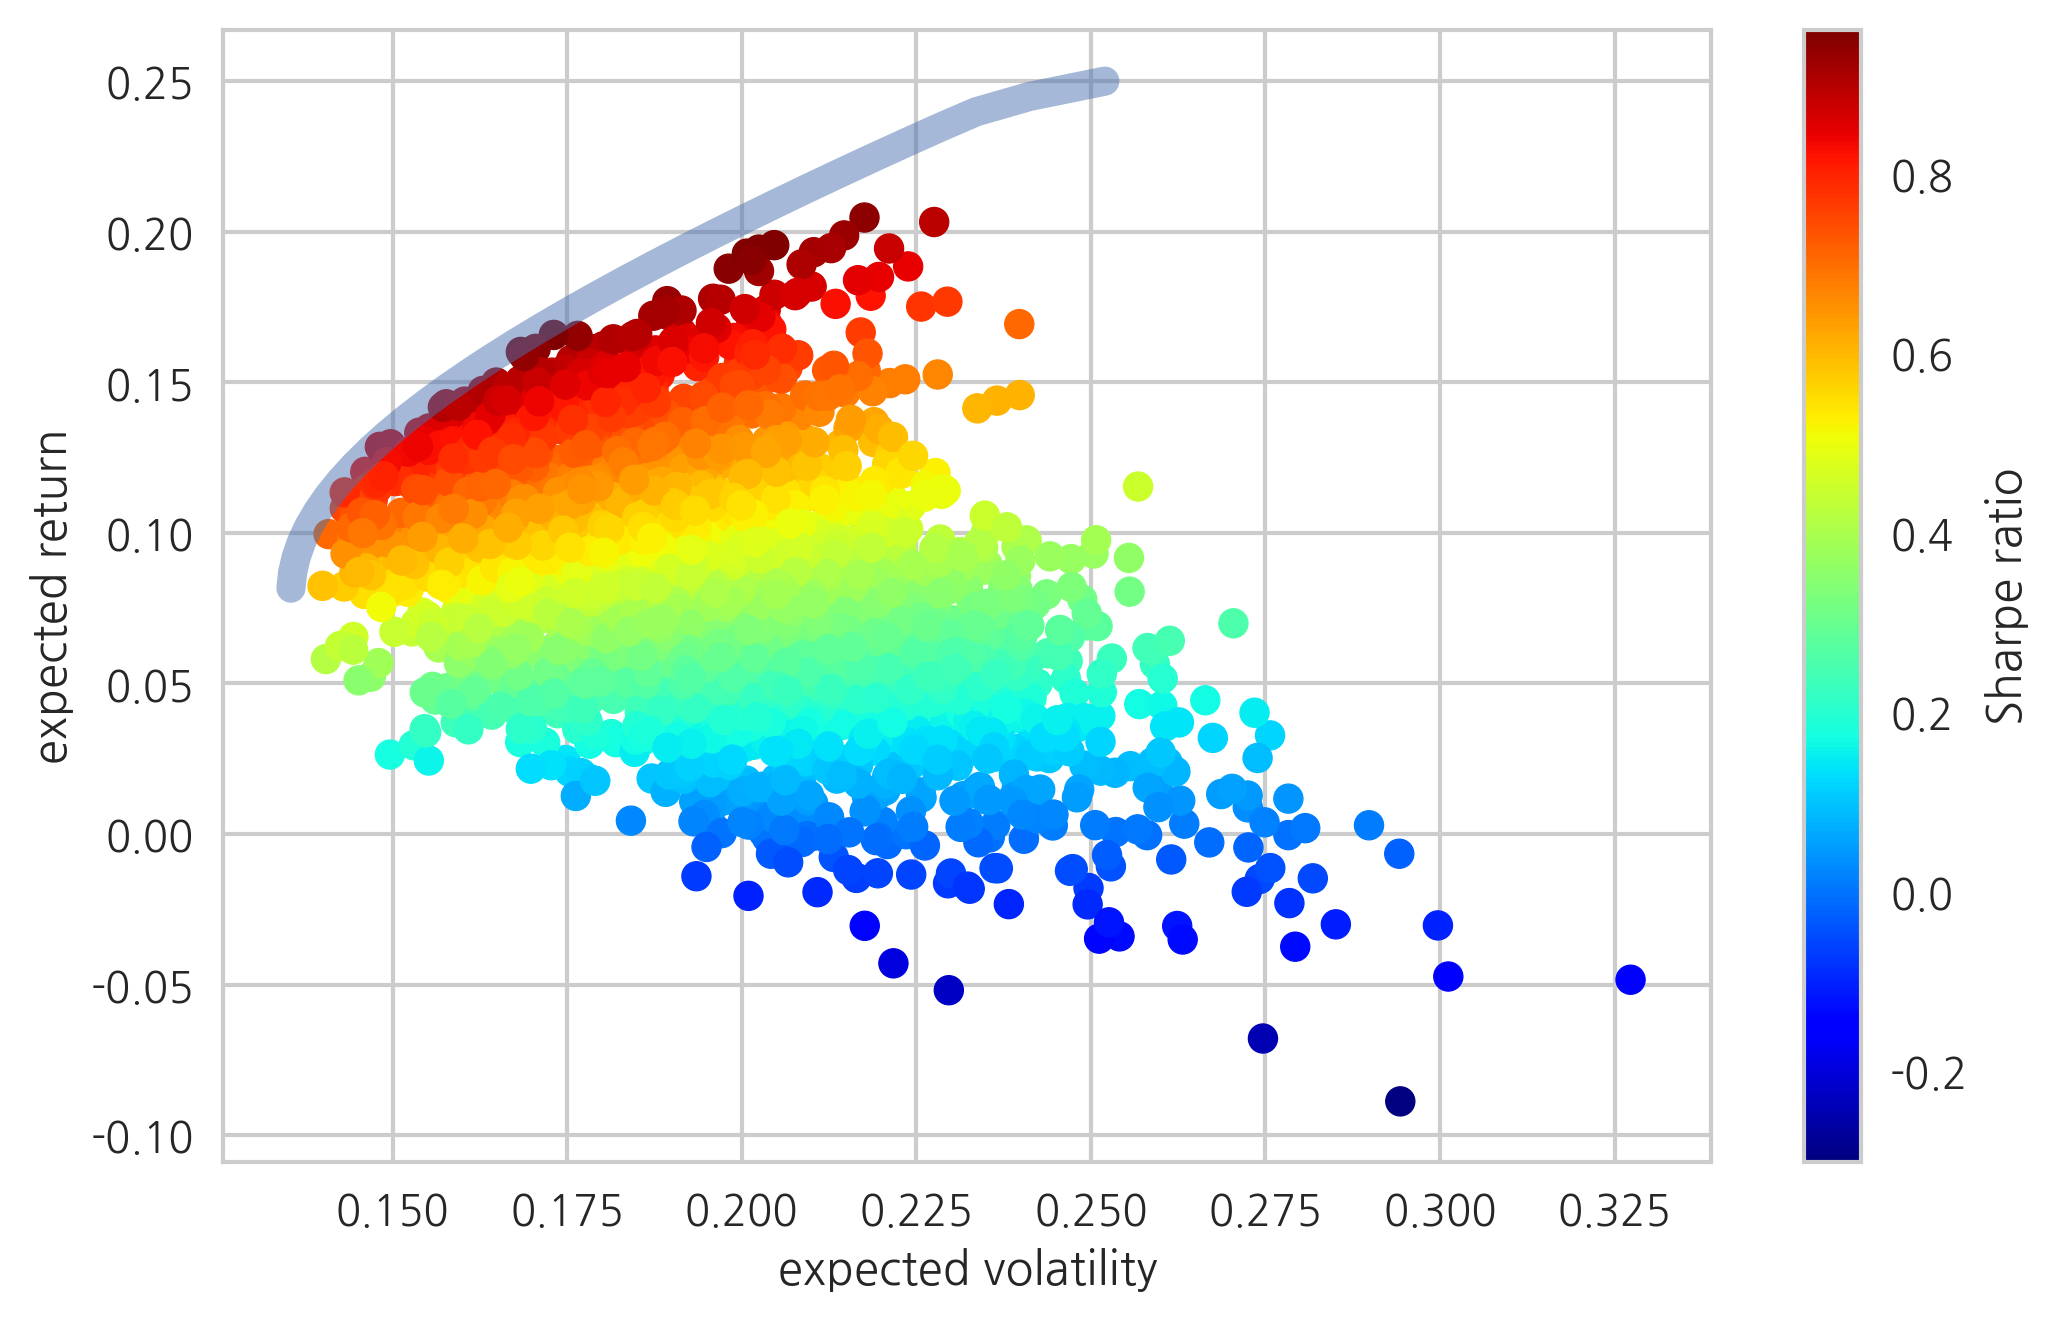

In [38]:
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o', cmap=mpl.cm.jet)
            # 무작위 포트폴리오

plt.plot(evols, f(evols), lw=7, alpha=0.5)    

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

## 자본시장선

* 무위험 자산을 포함한 최적 포트폴리오 집합
* 무위험 자산을 지나며 효율적 투자선 $f(x)$에 접하는 직선 $t(x)$
$$ t(x) = a + bx $$
$$ t(0) = r_f $$
$$ t(x) = f(x) $$
$$ t'(x) = f'(x) $$

In [39]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [40]:
opt = sco.fsolve(equations, [0.01, 1.0, 0.1])
opt

array([ 0.01      ,  0.9843057 ,  0.23188781])

In [41]:
np.round(equations(opt), 6)

array([ 0.,  0.,  0.])

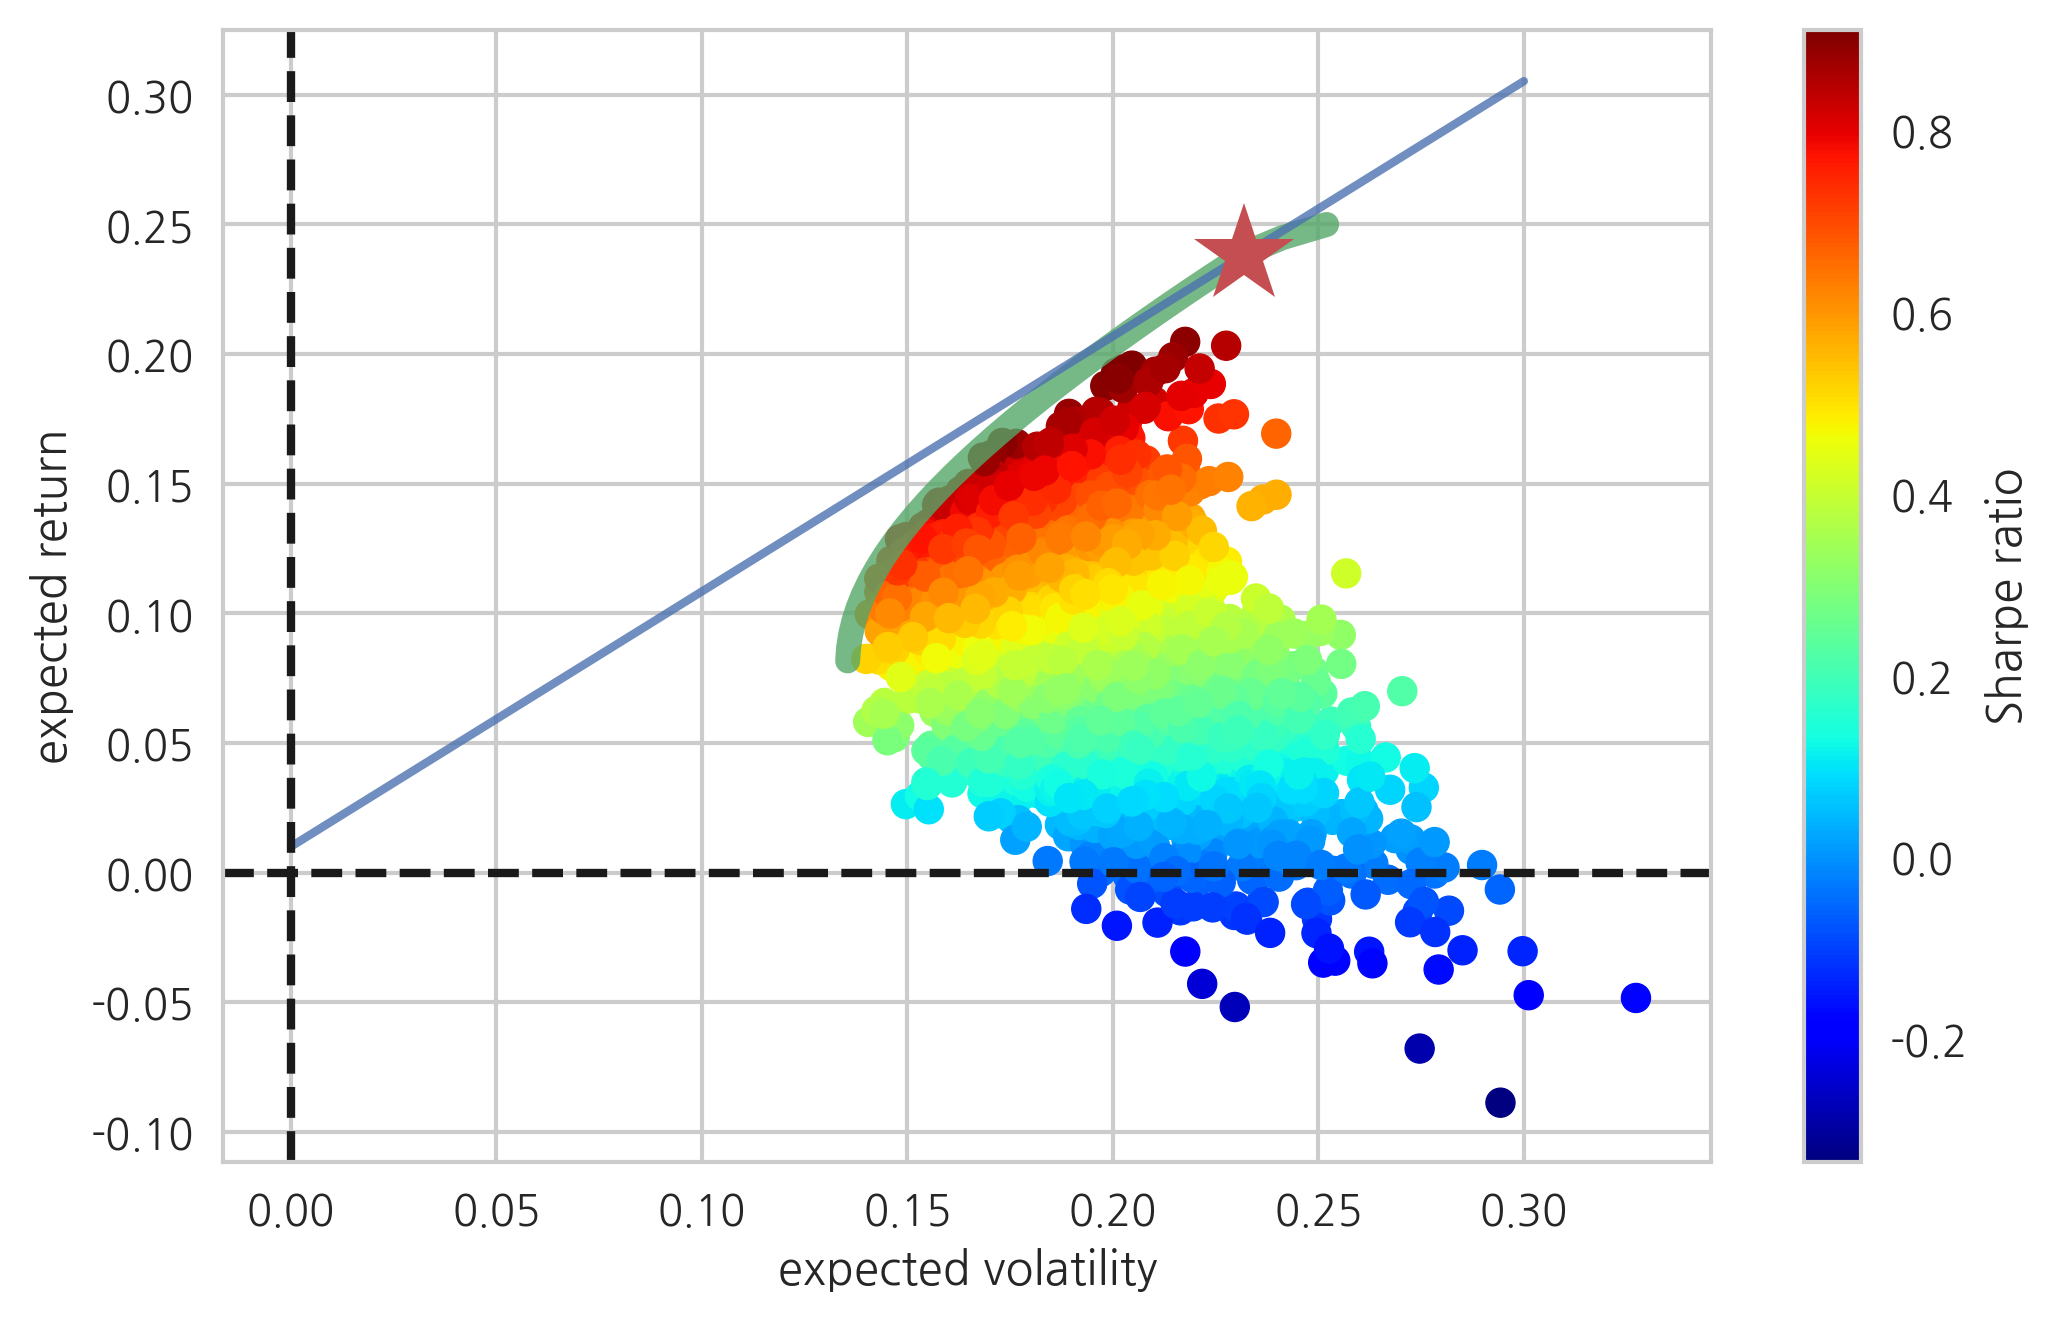

In [42]:
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o', cmap=mpl.cm.jet)
            # 무작위 포트폴리오
plt.plot(evols, erets, 'g', lw=6, alpha=0.8)
            # 효율적 투자선
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=2, alpha=0.8)
            # 자본 시장선
plt.plot(opt[2], f(opt[2]), 'r*', markersize=25.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [43]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
res['x'].round(3)

array([ 0.698,  0.   ,  0.301,  0.   ,  0.001])